### Pytorch workflow

1) data preparation
2) build model
3) fitting the model 
4) making predictions and evaluating the model (inference)
5) saving and loading the model
6) putting all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#### Making linear regression

In [2]:
weight = 0.7
bias = 0.3

In [3]:
#Making data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end ,step).unsqueeze(dim =1)
y = weight * X + bias
X[:10], y[:10], len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [4]:
len (X), len(y)

(50, 50)

#### Splitting to train and test

Train->Validate->Test


In [5]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Trainnig data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='black', s=4, label='Predictions')
        
    plt.legend(prop={"size": 14});
    

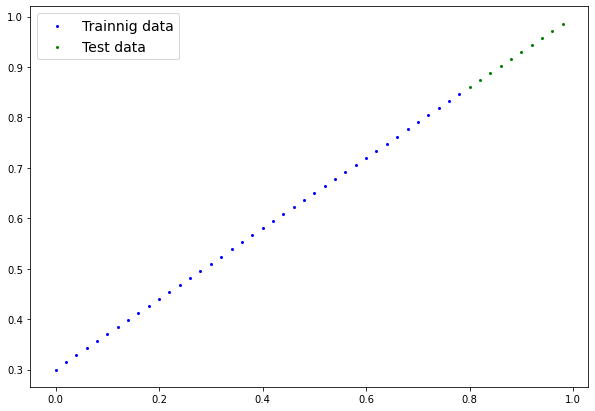

In [7]:
plot_predictions()

In [8]:
# our firsy pytorch model

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                              dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
        # Forward method to define computation in the model
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias 


Main classes 
    torch.nn - Contains all buildings for computional graphs
    torch.nn.Parameter what parameters our model should try and learn
    torch.nn.Module The base class for all neural network modules, if 
    you subclass it you should overwrite forward()
    torch.optim - where optimizers live
    def forward - All nn.Module subclasses require you to overwrite
    forward() this method defines what happens in forward computations

In [26]:
### Checking content of our module

#Create aninstanse of our model(this is subclass of nn.Module)
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

In [13]:
##Making predictoins with torch.inference_mode()
#Switches off grad tracking - faster code
# Similar but worse torch.no_grad
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

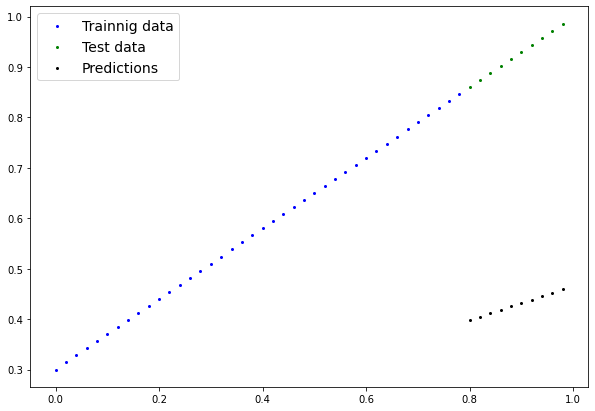

In [14]:
plot_predictions(predictions=y_preds)

### Training model

#### Loss function

In [15]:
#Move  from some unknown parameters to some known parameters

In [16]:
#Way to measure how poor predicitons are is to use loss(cost) function
#LossFunct is funtion to measure how wrong your predictions are to ideal outputs

To train model we need
1) Loss Function
2) Optimizer
3) Trainnig loop
4) Testing lop

In [27]:
#Setup Loss Func
loss_fn = nn.L1Loss()

#Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

Building a training loop
0) Loop throuhty the data
1) Forward pass (forward function) - make predicions
2) Calculate the loss
3) Optimizer zero grad
4) Loss backward - move backward throught the network to calculate gradients of each parametrs of our model with respet to loss (**backprop** )
5) Optimizer step - use optimizer to adjust model parameters to make better preditions

In [18]:
#Epochs - number of loops throught the data
torch.manual_seed(42)
epochs = 30
for epoch in range(epochs):
    #Set model to trainig mode
    model_0.train()
    
    #1 Forward pass
    y_pred = model_0(X_train)
    
    #Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print (loss)
    
    #Optimizer zero grad
    optimizer.zero_grad()
    
    #4 Making backprop
    loss.backward()
    
    #5 Step optomizer
    optimizer.step()
    
    #Turns 0ff gradient tracking and switches model to evaluztion mode
    #model_0.eval()
    

In [19]:
with torch.inference_mode():
    y_preds = model_0(X_test)
    

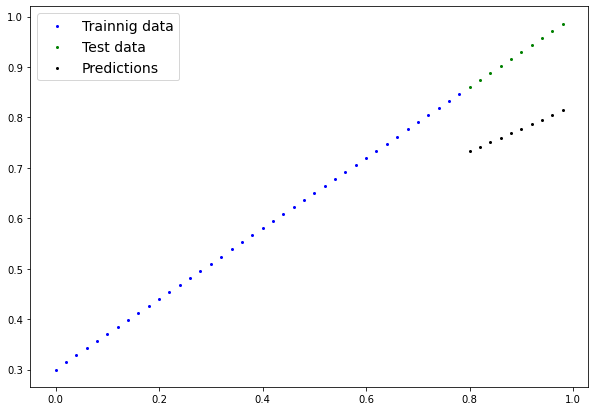

In [20]:
plot_predictions(predictions=y_preds)

In [28]:
#Epochs - number of loops throught the data
epoch_count =[]
Train_loss = []
Test_loss = []

torch.manual_seed(42)
epochs = 200
for epoch in range(epochs):
    #Set model to trainig mode
    model_0.train()
    
    epoch_count.append(epoch)
    
    #1 Forward pass
    y_pred = model_0(X_train)
    
    #Calculate the loss
    loss = loss_fn(y_pred, y_train)
    #print (loss)
    Train_loss.append(float(loss))
    #Optimizer zero grad
    optimizer.zero_grad()
    
    #4 Making backprop
    loss.backward()
    
    #5 Step optomizer
    optimizer.step()
######TESTING PART -------------------------   
    #Turns 0ff gradient tracking and switches model to evaluztion mode
    model_0.eval()
    with torch.inference_mode():#Swirch gradients tracking
        #1 Do forward pass
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        Test_loss.append(float(test_loss))
    if epoch % 50 == 0:
        print (f"Epoch :{epoch}| Train loss: {loss}|Test Loss:{test_loss}")
        print (model_0.state_dict())

Epoch :0| Train loss: 0.31288138031959534|Test Loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch :50| Train loss: 0.04167863354086876|Test Loss:0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch :100| Train loss: 0.024458957836031914|Test Loss:0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch :150| Train loss: 0.0072835348546504974|Test Loss:0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])


In [29]:
weight, bias

(0.7, 0.3)

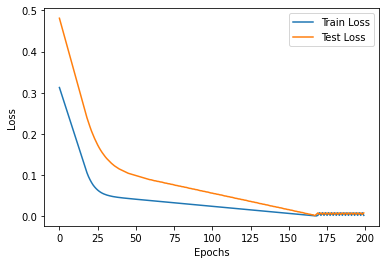

In [30]:
plt.plot(epoch_count, Train_loss, label = "Train Loss")
plt.plot(epoch_count, Test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Saving a model

Methods to save and load

1)torch.save() - Python pickle format
2) torch.load() - load model
3) torch.nn.Module.load_state_dict() -allows to load models state dict to see models params

In [34]:
#Saving module

from pathlib import Path

#Crate models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save path
MODEL_NAME = "01_module_model_0_SS_dict.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
#Save the model state dict
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

In [35]:
#Loading model

loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [37]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
    
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
08:31